In [ ]:
#1.Background

#K-Means clustering is an unsupervised learning algorithm. There is no labeled data for this 
#clustering, unlike in supervised learning. K-Means performs the division of objects into clusters 
#that share similarities and are dissimilar to the objects belonging to another cluster.



In [ ]:
#2. Problem Statement

#It is crucial to understand customer behaviour and categorise customers based on 
#their demography and buying behaviour.
#This is broadly one aspect of customer segmentation.
#Marketers use it to better tailor their marketing efforts to various audience subsets.
#The subsets can be in terms of promotional, marketing and product development strategies

#An established company that analyze customer data for other companies and target advertisements.
#A local bank wants to target their customers with new promotional offers offered by the bank.
#They have consulted the company to help them find customer groups for the offers.
#As one of their data scientists, you are given this particular task.
#You are provided with a dataset that contains the income and spending of anonymous customers.
#Your task is to provide a solution that segment their customers leading them for marketing in most effective way.

In [57]:
#3. Installing and improting libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler


from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans

#For Hopkins

from sklearn.neighbors import NearestNeighbors
from random import sample
from numpy.random import uniform
from math import isnan


import warnings
warnings.filterwarnings("ignore")

In [4]:
#4. Data Acquisition and description

#4.1 Data acquisition

df = pd.read_csv("https://raw.githubusercontent.com/ingledarshan/INSAID/main/Mall_Customers.csv")

df.head()


,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [5]:
df.shape

(200, 5)

In [ ]:
#4.2 Data Description- The data has has 5 columns and 200 records

#Customer ID- Tells the ID of the customer
#Gender- Tells that whether one is male or female
#Age- Age of the customer
#Annual Income- Annual income of the customer
#Spending Score- A score of 100 tells a customer is spend-thrift and a score of 0 tells a customer is miser



In [6]:
df.info()

#All the columns have no missing values and other than gender(is an object) others are integer

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [12]:
df.describe()

#Most of the variables are evenly distributed as mean value and 2nd quartile distribution value is same

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [13]:
#5. Data Pre-processing

#checking duplicates

df.duplicated().sum()

#there are no duplicates in the dataset

0

In [ ]:
#6. Exploratory Data Analysis

In [19]:
#Making cross tabulations by gender

df.groupby(['Gender']).mean()[['Age', 'Annual Income (k$)',
       'Spending Score (1-100)']]

#The average age of females is 38, with annual income of 59,000 and spending score of 51.
#The average age of men is 40, with aanual income higher than female (62,000)and spending score of 48(less than 
#female).


,Age,Annual Income (k$),Spending Score (1-100)
Gender,,,
Female,38.098214,59.250000,51.526786
Male,39.806818,62.227273,48.511364


In [20]:
df.groupby(['Gender']).median()[['Age', 'Annual Income (k$)',
       'Spending Score (1-100)']]

#The average age of females is 35, with annual income of 60,000 and spending score of 50.
#The average age of men is 37, with aanual income higher than female (62,000)and spending score of 50.

,Age,Annual Income (k$),Spending Score (1-100)
Gender,,,
Female,35.0,60.0,50.0
Male,37.0,62.5,50.0


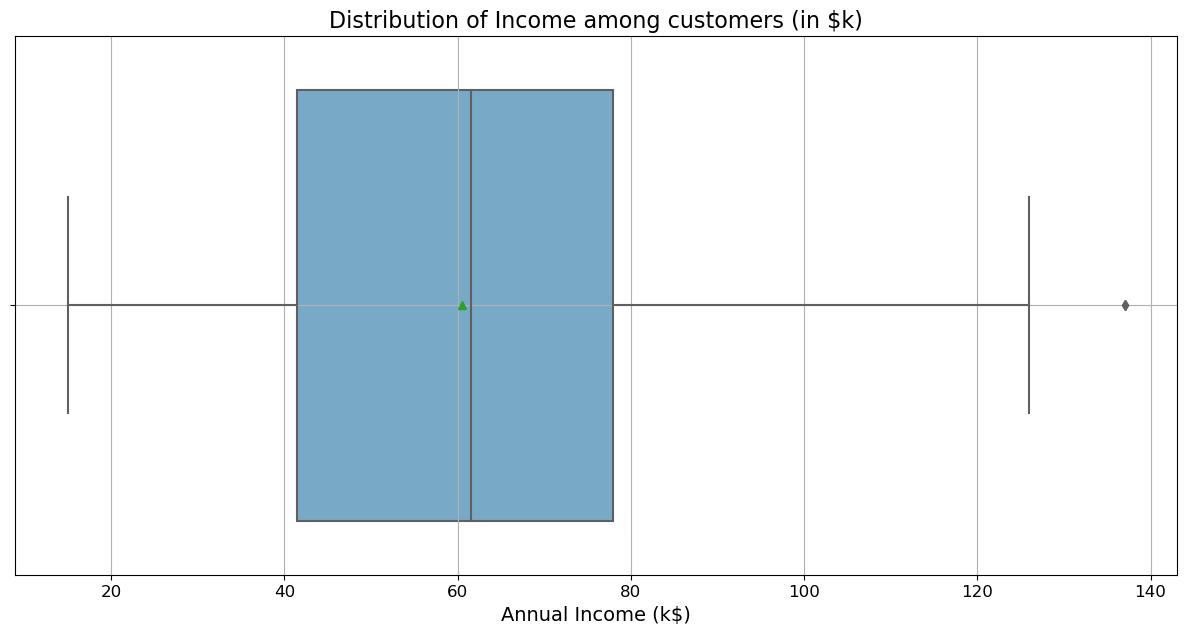

In [29]:
#Checking the distribution of the income variable

#Create a figure of 15 x 7 inches
fig = plt.figure(figsize=(15, 7))

# Create a boxplot for INCOME
sns.boxplot(x='Annual Income (k$)', data=df, showmeans=True, palette='Blues')

# Add cosmetics
plt.xlabel(xlabel='Annual Income (k$)', fontsize=14)
plt.xticks(fontsize=12)
plt.title(label='Distribution of Income among customers (in $k)', fontsize=16)
plt.grid(b=True)

# Display the output
plt.show()

#The IQR shows that 50% percentile of the customers have income of around 62,000. 

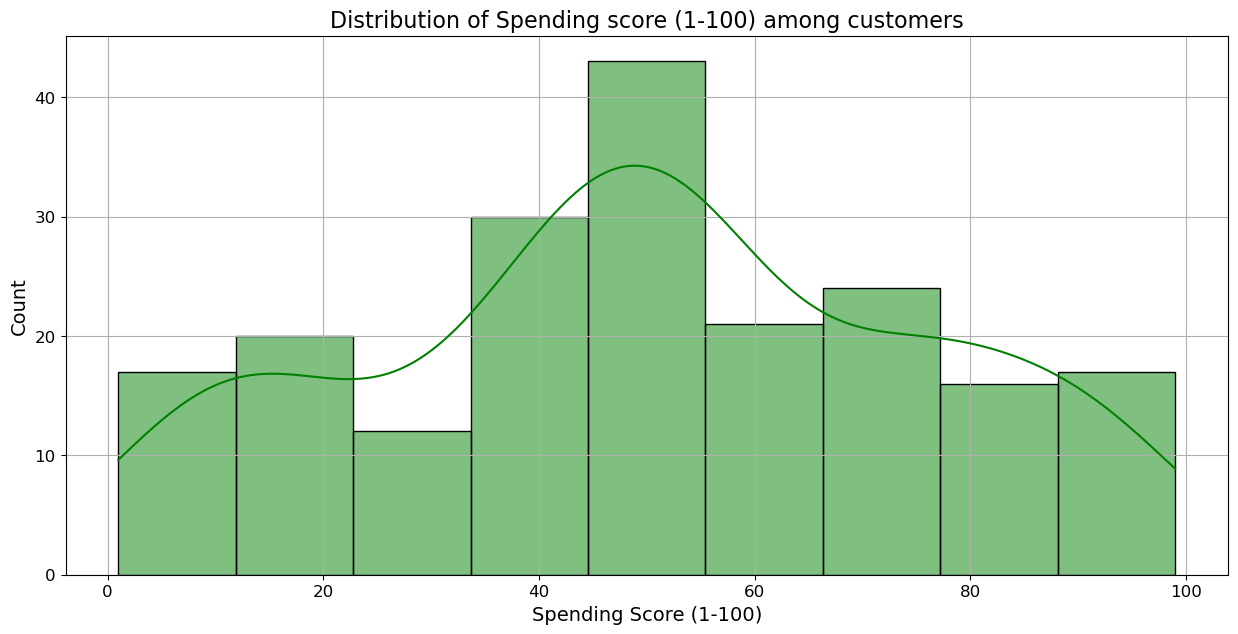

In [31]:
#Creating a histogram of Spending columns

#Create a figure of 15 x 7 inches
fig = plt.figure(figsize=(15, 7))

# Create a histplot for SPEND
sns.histplot(x='Spending Score (1-100)', data=df, kde=True, color='green')

# Add cosmetics
plt.xlabel(xlabel='Spending Score (1-100)', fontsize=14)
plt.ylabel(ylabel='Count', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.title(label='Distribution of Spending score (1-100) among customers', fontsize=16)
plt.grid(b=True)

# Display the output
plt.show()

# Majority of the customers had spending scores between 40-60.

In [32]:
#Plotting a graph between annual income and spending scores

df.iloc[:,[3,4]]

,Annual Income (k$),Spending Score (1-100)
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40
...,...,...
195,120,79
196,126,28
197,126,74
198,137,18


In [33]:
X = df.iloc[:,[3,4]].values #This will numpy array
X[:10]

array([[15, 39],
       [15, 81],
       [16,  6],
       [16, 77],
       [17, 40],
       [17, 76],
       [18,  6],
       [18, 94],
       [19,  3],
       [19, 72]])

In [34]:
X1 = df.iloc[:,[3,4]] #This will be dataframe
X1[:10]

,Annual Income (k$),Spending Score (1-100)
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40
5,17,76
6,18,6
7,18,94
8,19,3
9,19,72


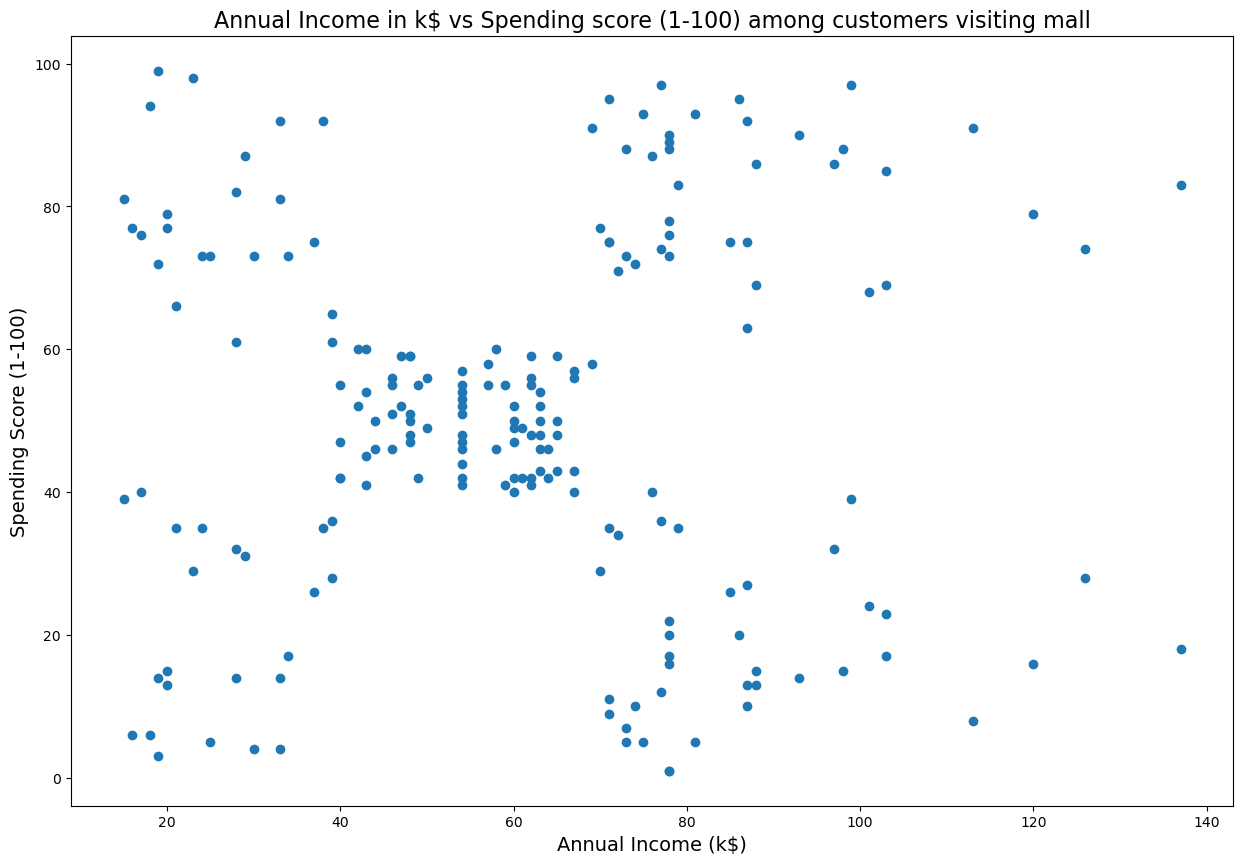

In [35]:
#plotting graph between annual income and spending scores

fig = plt.figure(figsize=(15, 10))
plt.scatter(X[:,0], X[:,1])
plt.xlabel(xlabel='Annual Income (k$)', fontsize=14)
plt.ylabel(ylabel='Spending Score (1-100)', fontsize=14)
plt.title(label='Annual Income in k$ vs Spending score (1-100) among customers visiting mall', fontsize=16)
plt.show()

#The graph shows few clusters of customers segregated into particular annual income and spending scores.

In [ ]:
#6. Model Development and Evaluation

#6.1 Hopkins Statistics- Very Important to be used in all the K means clusterings

#It gives a value which indicates the cluster tendancy. In other words, how well the data can be clustered.

#If the value is between {0.01,....., 0.3}, the data is regularly spaced.
#If the value is around 0.5, the data is random.
#If the value is between {0.7,....., 0.99}, it has a high tendancy to cluster.

In [37]:
from sklearn.neighbors import NearestNeighbors
from random import sample
from numpy.random import uniform
from math import isnan

def hopkins(X):
    d = X.shape[1]
    n = len(X)
    m = int(0.1*n)
    nbrs = NearestNeighbors(n_neighbors=1).fit(X.values)
    
    rand_X = sample(range(0, n, 1), m)
    
    ujd = []
    wjd = []
    for j in range(0, m):
        u_dist, _ = nbrs.kneighbors(uniform(np.amin(X,axis=0),np.amax(X,axis=0),d).reshape(1, -1), 2, return_distance=True)
        ujd.append(u_dist[0][1])
        w_dist, _ = nbrs.kneighbors(X.iloc[rand_X[j]].values.reshape(1, -1), 2, return_distance=True)
        wjd.append(w_dist[0][1])
 
    H = sum(ujd) / (sum(ujd) + sum(wjd))
    if isnan(H):
        print(ujd, wjd)
        H = 0
 
    return H


In [38]:
hopkins(X1)

0.7753157405468447

In [39]:
hopkins(X1)

#The value changes everytime you run it

0.7728037055045105

In [42]:
l = []
for i in range(1000):
    l.append(hopkins(X1))
print(sum(l)/len(l)) # average Hopkin's score

# the value is between {0.7,....., 0.99}, it has a high tendancy to cluster.
#Thus data fit fro K mean clustering

0.7631659019001183


In [43]:
#6.2 In this section we will apply K-Means clustering to our customer data.

#6.2.1 Experimenting with two clsuters
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=2)
kmeans.fit(X)

print(kmeans.cluster_centers_)

#The first columns is annual income and the second is spending score.
#It tells that if we chose two clusters then they will have these two classes of these variables.

[[37.28888889 50.28888889]
 [79.6        50.12727273]]


In [44]:
print(kmeans.labels_)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]


In [46]:
print(len(kmeans.labels_))

200


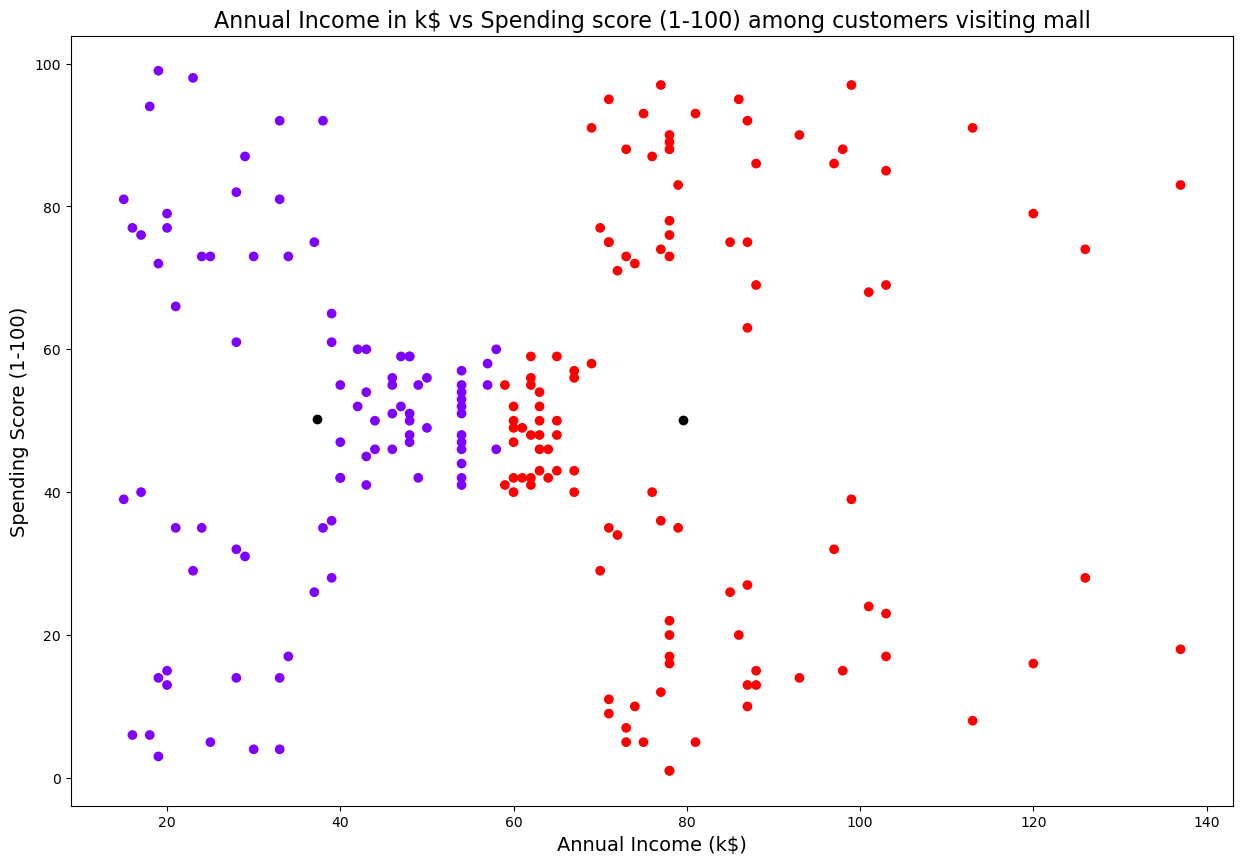

In [48]:
#making graph
plt.figure(figsize=(15, 10))
plt.scatter(X[:, 0], X[:, 1], label='True Position',
            c=kmeans.labels_, cmap='rainbow')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1],
            c='black')

plt.xlabel(xlabel='Annual Income (k$)', fontsize=14)
plt.ylabel(ylabel='Spending Score (1-100)', fontsize=14)
plt.title(label='Annual Income in k$ vs Spending score (1-100) among customers visiting mall', fontsize=16)
plt.show()

#We can see two clsuters with cetroids of both clusters in black

In [49]:
#6.2.2 Experimenting with 3 clusters

kmeans = KMeans(n_clusters=3)
kmeans.fit(X)

print(kmeans.cluster_centers_)

##The first columns is annual income and the second is spending score.
#It tells that if we chose three clusters then they will have these two classes of these variables.

[[44.15447154 49.82926829]
 [87.         18.63157895]
 [86.53846154 82.12820513]]


In [50]:
print(kmeans.labels_)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2
 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1
 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2]


In [51]:
print(len(kmeans.labels_))

200


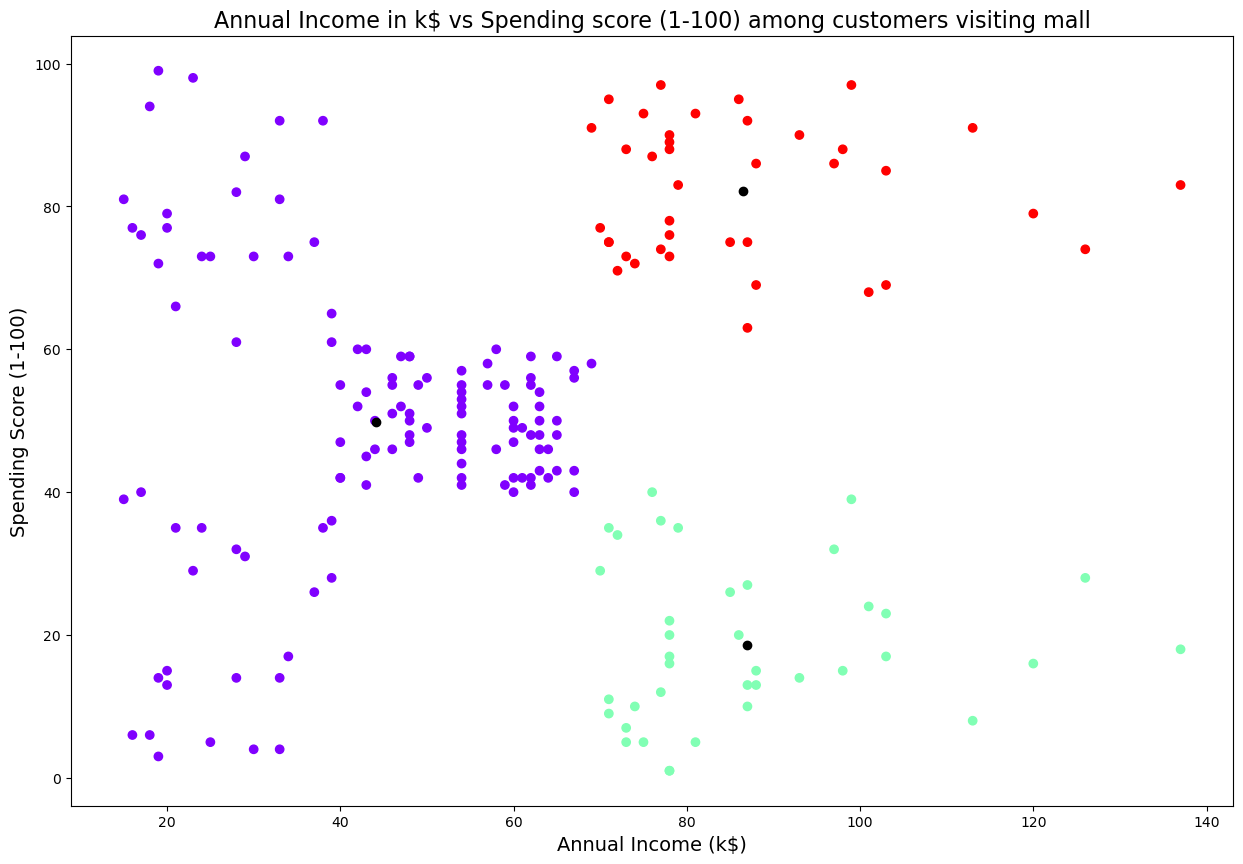

In [52]:
#making graph
plt.figure(figsize=(15, 10))
plt.scatter(X[:, 0], X[:, 1], label='True Position',
            c=kmeans.labels_, cmap='rainbow')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1],
            c='black')

plt.xlabel(xlabel='Annual Income (k$)', fontsize=14)
plt.ylabel(ylabel='Spending Score (1-100)', fontsize=14)
plt.title(label='Annual Income in k$ vs Spending score (1-100) among customers visiting mall', fontsize=16)
plt.show()

#We can see three clsuters with cetroids of both clusters in black

In [54]:
#6.3 Elbow method to determine number of clsuters to be choosen

#For determining  K(numbers of clusters) we use Elbow method.  Elbow Method is a 
#technique that we use to determine the number of centroids(k) to use in a k-means clustering algorithm.  
#In this method to determine the k-value we continuously iterate for k=1 to k=n 
#(Here n is the hyperparameter that we choose as per our requirement). For every value of k, 
#we calculate the within-cluster sum of squares (WCSS) value.

#WCSS - It is defined as the sum of square distances between the centroids and
#each points.

wcss = []

for i in range(2,11):
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
    
#wcss is inertia

In [55]:
wcss

[181363.59595959593,
 106348.37306211118,
 73679.78903948834,
 44448.45544793371,
 37239.83554245604,
 30227.606513152015,
 25018.576334776335,
 21794.8856090982,
 19643.65555219974]

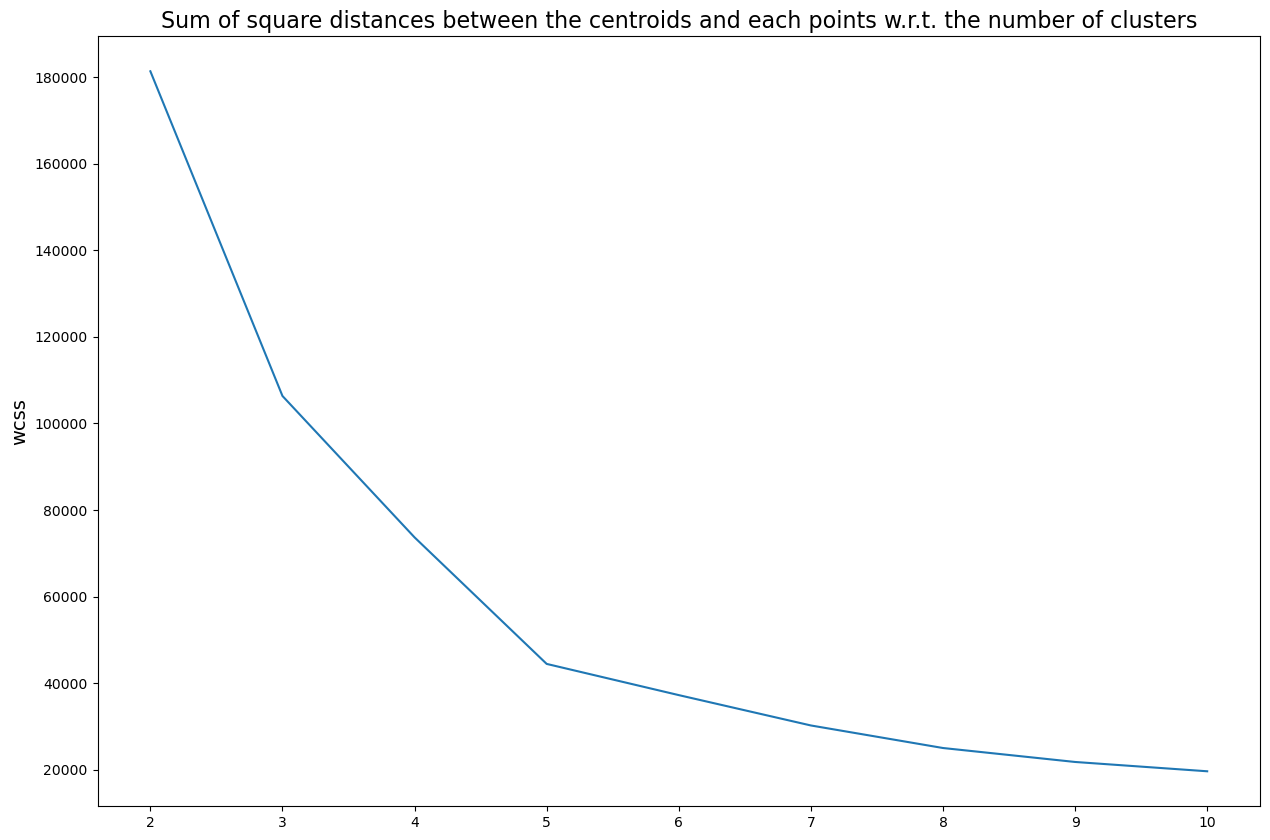

In [56]:
#Making curve for Elbow methods between no. of clusters and WCSS

plt.figure(figsize=(15,10))
plt.plot(range(2,11), wcss)

plt.ylabel(ylabel='wcss', fontsize=14)
plt.title(label='Sum of square distances between the centroids and each points w.r.t. the number of clusters', fontsize=16)
plt.show()

#5 seems to be the right point as slope seems to neutralize at this point.
#Therefore right number of clusters as per Elbow method is 5.


In [ ]:
#6.4 Silhoutte Analysis- Other method for choosing K value in K means

# In the Silhouette algorithm, we assume that the data has already been clustered into k clusters 
#by a clustering technique(Typically K-Means Clustering technique). Then for each data point, 
#we define the following:- C(i) -The cluster assigned to the ith data point |C(i)| – 
#The number of data points in the cluster assigned to the ith data point a(i) – 
#It gives a measure of how well assigned the ith data point is to it’s cluster.

#The value of the silhoutte score range lies between -1 to +1.
#A score closer to 1 indicates that the data point is very similar to other data points in the cluster.
#A score closer to -1 indicates that the data point is not similar to other data points in the cluster.

In [59]:
from sklearn.metrics import silhouette_score

sse =[]
for k in range(2,15):
    kmeans = KMeans(n_clusters=k).fit(X)
    sse.append([k, silhouette_score(X, kmeans.labels_)])


In [60]:
sse

[[2, 0.2968969162503008],
 [3, 0.46761358158775435],
 [4, 0.4931963109249047],
 [5, 0.553931997444648],
 [6, 0.5379675585622219],
 [7, 0.5288104473798049],
 [8, 0.4561894450189568],
 [9, 0.4553729779390266],
 [10, 0.44400170966580843],
 [11, 0.4341159466212173],
 [12, 0.4386071394328943],
 [13, 0.39379943714303506],
 [14, 0.4083931656194673]]

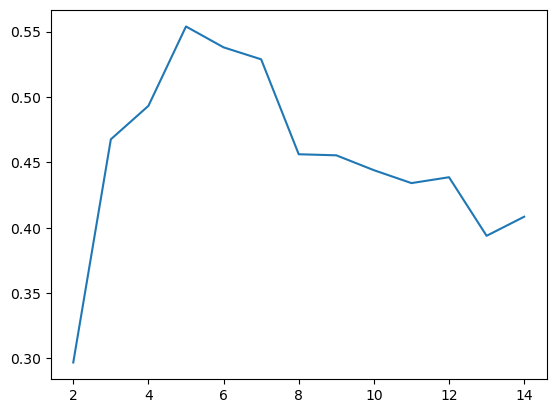

In [61]:
plt.plot(pd.DataFrame(sse)[0], pd.DataFrame(sse)[1])
plt.show()

#when we have large dataset then the curve is bellshaped
#Then we choose the highest point in the bell curve
#In our datset, as per silhoutte score 5 seems to be most promising
# So we have confirmed right no of clusters using elbow and silhoutte method

In [63]:
#8.5 Making final model using K=5 clusters derived from Elbow as well as Silhoutte method

kmeans = KMeans(n_clusters=5)
kmeans.fit(X)

print(kmeans.cluster_centers_)

#So below are the 5 cluster center with cluster centers.
#First column describes the annual income and second column describes the spending rate

[[86.53846154 82.12820513]
 [55.2962963  49.51851852]
 [25.72727273 79.36363636]
 [88.2        17.11428571]
 [26.30434783 20.91304348]]


In [65]:
print(kmeans.labels_)

[4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4
 2 4 2 4 2 4 1 4 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 0 3 0 1 0 3 0 3 0 1 0 3 0 3 0 3 0 3 0 1 0 3 0 3 0
 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3
 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0]


In [66]:
print(len(kmeans.labels_))

200


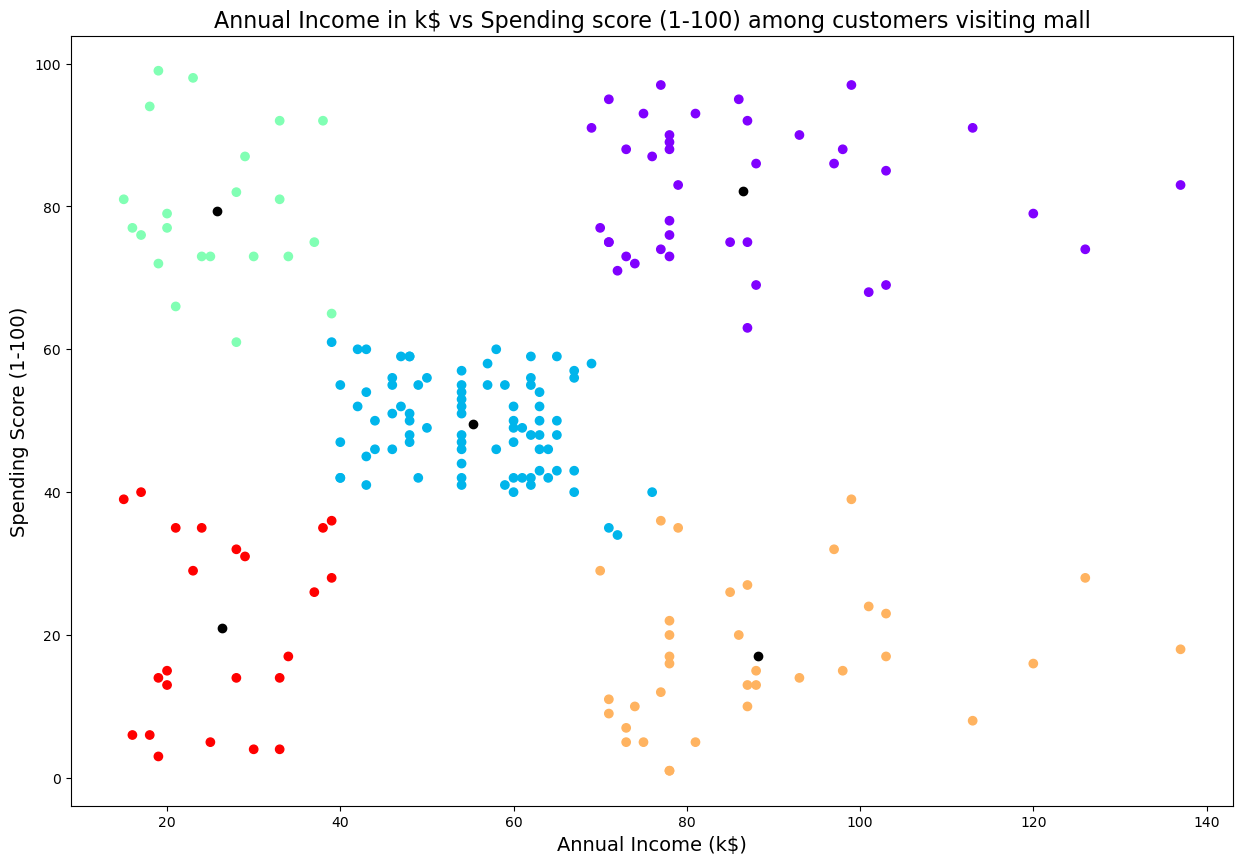

In [67]:
#making graph
plt.figure(figsize=(15, 10))
plt.scatter(X[:, 0], X[:, 1], label='True Position',
            c=kmeans.labels_, cmap='rainbow')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1],
            c='black')

plt.xlabel(xlabel='Annual Income (k$)', fontsize=14)
plt.ylabel(ylabel='Spending Score (1-100)', fontsize=14)
plt.title(label='Annual Income in k$ vs Spending score (1-100) among customers visiting mall', fontsize=16)
plt.show()

#We can see five clsuters with cetroids of both clusters in black

In [ ]:
#9.Conclusion
#The green cluster has customers with low income high spending
#The purple clsuter as customers with high income and high spending
#The blue cluster has customers with medium income and medium spending
#The red cluster has customers with low income and low spending
#The mustord cluster has customers with high income low spending

#Thus the bank should target customers falling in purple and green cluster as they spend high at malls.
#Bank should also make relevant offers for customers in blue cluster
#The mall team need to introspect the customers falling in mustard cluster as they are high income
#but spending less. Reasons for less spending need to be explored.